# Data Analysis 

## Set-Up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
np.random.seed(seed=0)

## Data Generator

In [5]:
from src.data_generator import DataGenerator
loc = 10
scale = 2
n = 1000
data_generator = DataGenerator(loc, scale, n)
X = data_generator.get_data()

## Plot Histogram 

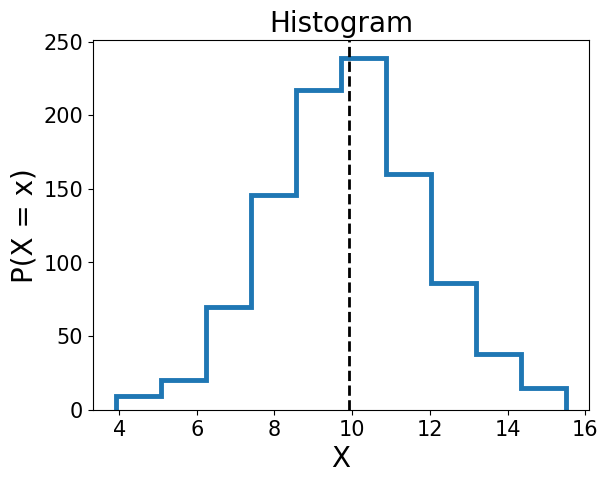

In [6]:
from src.plotter import Plotter
plotter = Plotter(X)
plotter.plot_hist()

In [8]:
from src.data_analysis import DataAnalysis
data_analysis = DataAnalysis(X)
data_analysis

In [9]:
data_analysis.standard_deviation()

1.9750540913890255

## Empirical CDF

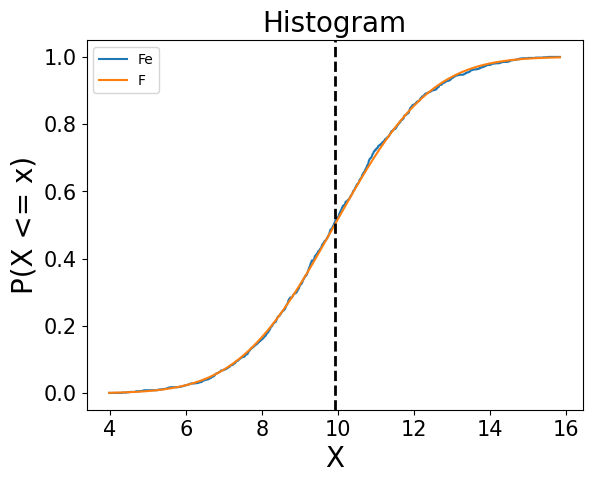

In [15]:
plotter.plot_cdf(dx=0.01)

## Empirical PDF

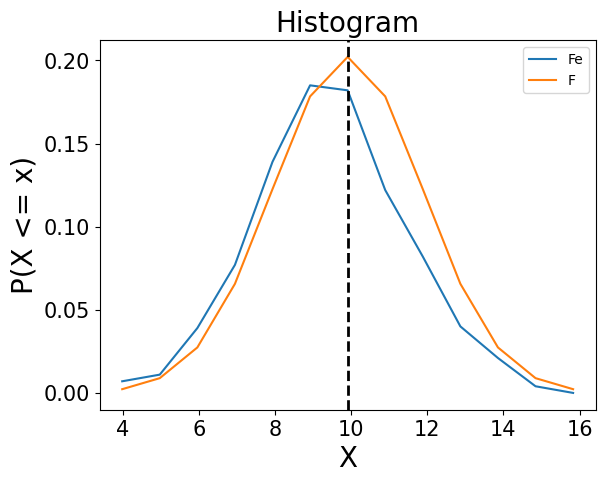

In [16]:
plotter.plot_pdf(dx=.9)

In [17]:
print(data_analysis.pdf_value(loc, 1))
print(data_analysis.pdf_value(loc + 1.96 * scale, 1))
print(data_analysis.pdf_value(loc - 1.96 * scale, 1))

0.20299999999999996
0.020000000000000018
0.048


## Do pdf values sum up to 1 ?

In [18]:
xs, fe = data_analysis.pdf_range(loc - 10 * scale, loc 
+ 10 * scale, 0.01)
np.sum(fe)

1.0

## Bootstrap

In [19]:
from src.bootstrap import Bootstrap
bootstrap = Bootstrap(X[:,0])

In [20]:
bootstrap.calculate_bootstrap()

In [21]:
bootstrap.mean()

9.907936947007487

In [22]:
bootstrap.std()

0.062420301069384634

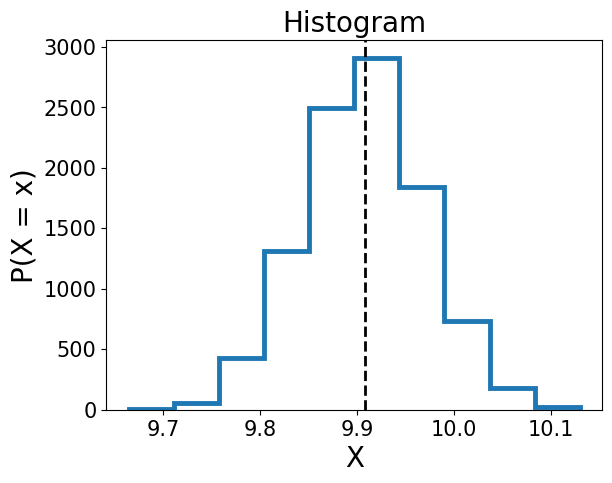

In [23]:
plotter_bootstrap = Plotter(bootstrap.bootstraps)
plotter_bootstrap.plot_hist()

## Confidence Interval

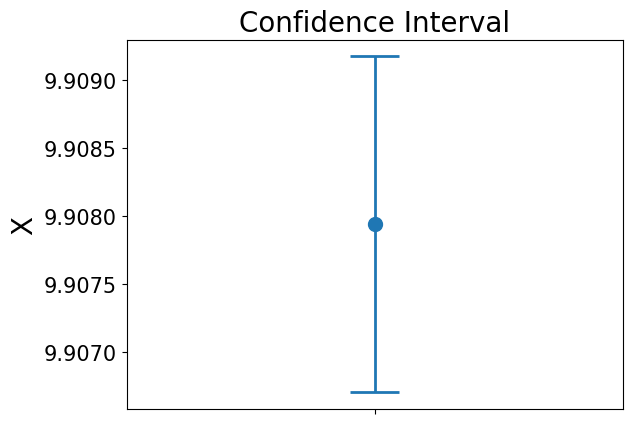

In [29]:
alpha = 0.05
plotter_bootstrap.plot_ci(alpha)